# Project: Wrangling and Analyze Data

In [480]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import requests
import json
import tweepy

## Data Gathering



In [360]:
twitter_achive = pd.read_csv('twitter-archive-enhanced.csv')

Using the Requests library to download the tweet image prediction (image_predictions.tsv) from url

In [361]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictionss.tsv', mode='wb') as file: 
    file.write(response.content)

In [362]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [363]:
with open('tweet.json', encoding="utf8") as file:
    data = json.load(file)

In [364]:
additional_tweet = pd.DataFrame(data)

In [483]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_achive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Success")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Success
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590

Success
261: 842892208864923648
Success
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success


Success
518: 810896069567610880
Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success


Success
784: 775350846108426240
Success
785: 775096608509886464
Success
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809: 771770456517009408
Success
810: 771500966810099713
Success
811: 771380798096281600
Success
812: 771171053431250945
Success
813: 771136648247640064
Success
814: 771102124360998913
Success


Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
1064: 741067306818797568
Success
1065: 740995100998766593
Success
1066: 740711788199743490
Success
1067: 740699697422163968
Success
1068: 740676976021798912
Success
10

Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
1313: 707014260413456384
Success
1314: 706904523814649856
Success
1315: 706901761596989440
Success
1316: 706681918348251136
Success
1317: 706644897839910912
Success
13

Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
1563: 688211956440801280
Success
1564: 688179443353796608
Success
1565: 688116655151435777
Success
1566: 688064179421470721
Success
15

Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
18

Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
20

Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
23

## Assessing Data
In this section, I will detect and document at least **eight (8) quality issues and two (2) tidiness issue**. Using **both** visual assessment and programmatic assessement to assess the data.



In [365]:
pd.set_option('display.max_colwidth', 60)

In [366]:
twitter_achive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This is Phineas. He's a mystical boy. Only ever appears ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This is Tilly. She's just checking pup on you. Hopes you...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This is Archie. He is a rare Norwegian Pouncing Corgo. L...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This is Darla. She commenced a snooze mid meal. 13/10 ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This is Franklin. He would like you to stop calling him ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558926688256/...,12,10,Franklin,None,None,None,None


In [367]:
twitter_achive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1186,718540630683709445,NaN,NaN,2016-04-08 20:46:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Get you a pup that can do both. 10/10 https://t.co/zSbyv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718540630683709445/...,10,10,None,None,None,None,None
1418,698355670425473025,NaN,NaN,2016-02-13 03:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This is Jessiga. She's a Tasmanian McCringleberry. Selfi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698355670425473025/...,10,10,Jessiga,None,None,None,None
1739,679511351870550016,NaN,NaN,2015-12-23 03:58:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Say hello to William. He makes fun of others because he'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679511351870550016/...,7,10,William,None,None,None,None
194,855245323840757760,NaN,NaN,2017-04-21 02:22:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",RT @dog_rates: Meet George. He looks slightly deflated b...,8.421635e+17,4.196984e+09,2017-03-16 00:00:07 +0000,https://twitter.com/dog_rates/status/842163532590374912/...,12,10,George,None,None,None,None
1266,709852847387627521,NaN,NaN,2016-03-15 21:24:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",*lets out a tiny whimper and then collapses* ...12/10 ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709852847387627521/...,12,10,None,None,None,None,None


In [368]:
twitter_achive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [369]:
# check for invalid names
twitter_achive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [370]:
# identify reason for invalid names and if it can be cleaned using text column
twitter_achive[twitter_achive['name'] == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Here is a pupper approaching maximum borkdrive. Zooming ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Here is a perfect example of someone who has their prior...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359805018113/...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Guys this is getting so out of hand. We only rate dogs. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559778025472/...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This is a mighty rare blue-tailed hammer sherk. Human al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874273214464/...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Viewer discretion is advised. This is a terrible attack ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This is a carrot. We only rate dogs. Please only send in...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823977771008/...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This is a very rare Great Alaskan Bush Pupper. Hard to s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",People please. This is a Deadly Mediterranean Plop T-Rex...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687239008257/...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This is a taco. We only rate dogs. Please only send in d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265223708672/...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Here is a heartbreaking scene of an incredible pupper be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558691414016/...,10,10,a,None,None,pupper,None


In [371]:
# identify reason for missing names and if it can be cleaned using text column
twitter_achive[twitter_achive['name'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Here we have a majestic great white breaching off South ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",When you watch your owner call another dog a good boy bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181411237888/...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Here's a puppo that seems to be on the fence about somet...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",You may not have known you needed to see this today. 13/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This... is a Jubilant Antarctic House Bear. We only rate...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Here we have a well-established sunblockerspaniel. Lost ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916733198337/...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Let's hope this flight isn't Malaysian (lol). What a dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100786774016/...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Here we have a northern speckled Rhododendron. Much sass...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193221509120/...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Here we have a 1949 1st generation vulpix. Enjoys sweat ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/...,5,10,None,None,None,None,None


In [372]:
# check tweets that where the images posted are possibly not dogs
twitter_achive[twitter_achive['text'].str.contains('We only rate dogs')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This... is a Jubilant Antarctic House Bear. We only rate...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/...,12,10,None,None,None,None,None
59,880872448815771648,NaN,NaN,2017-06-30 19:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Ugh not again. We only rate dogs. Please don't send in w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448815771648/...,12,10,None,None,None,None,None
93,874057562936811520,NaN,NaN,2017-06-12 00:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...","I can't believe this keeps happening. This, is a birb ta...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/874057562936811520/...,12,10,None,None,None,None,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",RT @dog_rates: We only rate dogs. This is quite clearly ...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/...,12,10,quite,None,None,None,None
127,867900495410671616,NaN,NaN,2017-05-26 00:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Unbelievable. We only rate dogs. Please don't send in no...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867900495410671616/...,12,10,None,None,None,None,None
131,867051520902168576,NaN,NaN,2017-05-23 16:16:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...","Oh my this spooked me up. We only rate dogs, not happy g...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867051520902168576/...,13,10,None,None,None,None,None
141,864873206498414592,NaN,NaN,2017-05-17 16:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",We only rate dogs. Please don't send in Jesus. We're try...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/864873206498414592/...,14,10,None,None,None,None,None
154,862096992088072192,NaN,NaN,2017-05-10 00:08:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",We only rate dogs. Please don't send perfectly toasted m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/862096992088072192/...,13,10,None,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",We only rate dogs. This is quite clearly a smol broken p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/...,12,10,quite,None,None,None,None
221,849776966551130114,NaN,NaN,2017-04-06 00:13:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Seriously guys? Again? We only rate dogs. Please stop su...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849776966551130114/...,12,10,None,None,None,None,None


In [373]:
# Reading through the text to understand the issues with non dog tweets 
with pd.option_context('max_colwidth', 150):
    display(twitter_achive[twitter_achive['text'].str.contains('We only rate dogs')].text)


25      This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad...
59      Ugh not again. We only rate dogs. Please don't send in well-dressed  floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://...
93      I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10 https://t.co/pwY...
118              RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
127     Unbelievable. We only rate dogs. Please don't send in non-canines like the "I" from Pixar's opening credits. Thank you... 12/10 https://t.co/JMhDN...
131     Oh my this spooked me up. We only rate dogs, not happy ghosts. Please send dogs only. It's a very simple premise. Thank you... 13/10 https://t.co/...
141             We only rate dogs. Please don't send

In [374]:
# identify naming patterns from text. This was done by visual assessment
with pd.option_context('max_colwidth', 150):
    display(twitter_achive[twitter_achive['text'].str.contains('name is')])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
168,859607811541651456,NaN,NaN,2017-05-03 03:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859607811541651456/photo/1,13,10,None,None,None,None,puppo
843,766714921925144576,7.667118e+17,4.196984e+09,2016-08-19 19:14:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",His name is Charley and he already has a new set of wheels thanks to donations. I heard his top speed was also increased. 13/10 for Charley,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13,10,my,None,None,None,None
1678,682047327939461121,NaN,NaN,2015-12-30 03:55:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682047327939461121/photo/1,10,10,None,None,None,None,None
1734,679736210798047232,NaN,NaN,2015-12-23 18:51:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679736210798047232/photo/1,9,10,None,None,None,None,None
2267,667524857454854144,NaN,NaN,2015-11-20 02:08:22 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667524857454854144/photo/1,12,10,None,None,None,None,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989038297088/photo/1,8,10,a,None,None,None,None
2313,666739327293083650,NaN,NaN,2015-11-17 22:06:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666739327293083650/photo/1,10,10,Lugan,None,None,None,None


In [375]:
# identify naming patterns from text by visual assessment
with pd.option_context('max_colwidth', 150):
    display(twitter_achive[twitter_achive['text'].str.contains('named')])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
603,798628517273620480,NaN,NaN,2016-11-15 20:47:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,6.675094e+17,4.196984e+09,2015-11-20 01:06:48 +0000,"https://twitter.com/dog_rates/status/667509364010450944/photo/1,https://twitter.com/dog_rates/status/667509364010450944/photo/1",12,10,None,None,None,None,None
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11,10,a,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9,10,a,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002554466305/photo/1,9,10,a,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874861563904/photo/1,9,10,a,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9,10,a,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323644657664/photo/1,10,10,a,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Coria

In [376]:
twitter_achive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [377]:
# Identifying invalid rating_numerator
twitter_achive[twitter_achive.rating_numerator > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This is Phineas. He's a mystical boy. Only ever appears ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This is Tilly. She's just checking pup on you. Hopes you...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This is Archie. He is a rare Norwegian Pouncing Corgo. L...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This is Darla. She commenced a snooze mid meal. 13/10 ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This is Franklin. He would like you to stop calling him ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558926688256/...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",12/10 simply brilliant pup https://t.co/V6ZzG45zzG,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780179869698/...,12,10,None,None,None,None,None
2324,666421158376562688,NaN,NaN,2015-11-17 01:02:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",*internally screaming* 12/10 https://t.co/YMcrXC2Y6R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666421158376562688/...,12,10,None,None,None,None,None
2329,666373753744588802,NaN,NaN,2015-11-16 21:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Those are sunglasses and a jean jacket. 11/10 dog cool a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666373753744588802/...,11,10,None,None,None,None,None
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097616637952/...,11,10,None,None,None,None,None


In [378]:
# Identifying invalid rating_denominator
twitter_achive[twitter_achive.rating_denominator > 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",The floofs have been released I repeat the floofs have b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176645140481/...,84,70,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Why does this never happen at my front door... 165/150 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/...,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Say hello to this unbelievably well behaved squad of dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Happy 4/20 from the squad! 13/10 for all https://t.co/eV...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This is Bluebert. He just saw that both #FinalFur match ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Happy Saturday here's 9 puppers on a bench. 99/90 good w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Here's a brigade of puppers. All look very prepared for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...","From left to right:\nCletus, Jerome, Alejandro, Burp, &a...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395643068416/...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Here is a whole flock of puppers. 60/50 I'll take the l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845121142784/...,60,50,a,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Happy Wednesday here's a bucket of pups. 44/40 would pet...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031882764288/...,44,40,None,None,None,None,None


In [379]:
twitter_achive[twitter_achive.rating_numerator == 75]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...","RT @dog_rates: This is Logan, the Chow who lived. He sol...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...","This is Logan, the Chow who lived. He solemnly swears he...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/...,75,10,Logan,None,None,None,None


In [380]:
twitter_achive[twitter_achive.rating_numerator == 960]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",@jonnysun @Lin_Manuel ok jomny I know you're excited but...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [381]:
# checking for duplicate rows
twitter_achive[twitter_achive.duplicated(subset=['name', 'expanded_urls','rating_numerator','rating_denominator' ],keep='first')].sort_values(by='name') 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
780,775733305207554048,NaN,NaN,2016-09-13 16:30:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This is Anakin. He strives to reach his full doggo poten...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775733305207554048/...,11,10,Anakin,doggo,None,None,None
1067,740676976021798912,NaN,NaN,2016-06-08 22:48:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...","Meet Baloo. He's expecting a fast ground ball, hence the...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740676976021798912/...,11,10,Baloo,None,None,pupper,None
1421,698195409219559425,NaN,NaN,2016-02-12 17:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698195409219559425/...,9,10,Beau,None,None,None,None
1683,681694085539872773,NaN,NaN,2015-12-29 04:31:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This is Bo. He's a Benedoop Cumbersnatch. Seems frustrat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681694085539872773/...,11,10,Bo,None,None,pupper,None
864,762464539388485633,NaN,NaN,2016-08-08 01:44:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This is Buddy. His father was a bear and his mother was ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762464539388485633/...,12,10,Buddy,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This is Timison. He just told an awful joke but is still...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792070062081/...,10,10,Timison,None,None,None,None
1578,687317306314240000,NaN,NaN,2016-01-13 16:56:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",This is Tyrone. He's a leaf wizard. Self-motivated. No e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687317306314240000/...,11,10,Tyrone,None,None,None,None
280,839549326359670784,NaN,NaN,2017-03-08 18:52:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",Meet Winston. He knows he's a little too big for the swi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/839549326359670784/...,12,10,Winston,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",We only rate dogs. This is quite clearly a smol broken p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/...,12,10,quite,None,None,None,None


In [382]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [383]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
657,682303737705140231,https://pbs.twimg.com/media/CXgHoLnWAAA8i52.jpg,1,seat_belt,0.997659,False,Lakeland_terrier,0.001731,True,Airedale,0.000204,True
992,708109389455101952,https://pbs.twimg.com/media/CdO1u9vWAAApj2V.jpg,1,Staffordshire_bullterrier,0.516106,True,American_Staffordshire_terrier,0.236075,True,kelpie,0.069750,True
92,667546741521195010,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1,toy_poodle,0.787424,True,miniature_poodle,0.202225,True,teddy,0.004047,False
445,674646392044941312,https://pbs.twimg.com/media/CVzTUGrW4AAirJH.jpg,1,flat-coated_retriever,0.837448,True,groenendael,0.086166,True,Labrador_retriever,0.016052,True
864,697270446429966336,https://pbs.twimg.com/media/Ca0zxGjW8AEfyYl.jpg,1,toy_poodle,0.880014,True,miniature_poodle,0.100136,True,Norfolk_terrier,0.007027,True


In [384]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [385]:
image_predictions[image_predictions.duplicated(keep= False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [386]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [387]:
# checking for inconsitent category
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [388]:
image_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [389]:
additional_tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears ...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'ur...","{'media': [{'id': 892420639486877696, 'id_str': '8924206...","<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you. Hopes you...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'ur...","{'media': [{'id': 892177413194625024, 'id_str': '8921774...","<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. L...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'ur...","{'media': [{'id': 891815175371796480, 'id_str': '8918151...","<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 ha...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'ur...","{'media': [{'id': 891689552724799489, 'id_str': '8916895...","<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop calling him ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]...","{'media': [{'id': 891327551943041024, 'id_str': '8913275...","<a href=""http://twitter.com/download/iphone"" rel=""nofoll...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [390]:
additional_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [391]:
additional_tweet.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000,8.860534e+17


In [392]:
# checking duplicates among columns in the datasets
all_columns = pd.Series(list(twitter_achive) + list(image_predictions))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

In [393]:
# checking duplicates among columns in datasets
all_columns = pd.Series(list(twitter_achive) + list(image_predictions) + list(additional_tweet))
all_columns[all_columns.duplicated()]

17                 tweet_id
37                   source
38    in_reply_to_status_id
40      in_reply_to_user_id
dtype: object

### Quality issues
1. Missing values represented as None instead of Null in `twitter_achive`*table*

2. Column with high amount of Null and not important to our Analysis in `twitter_achive`*table* 

3. `twitter_achive` Retweet rows are like duplicate, and won't be of importance to our Analysis

4. Erroneous datatype(timestamp) in `twitter_achive`*table*

5. rating_numerator and rating_denominator datatype should be float not int in `twitter_achive`*table* 

6. duplicate tweet present indicative in (name, expanded_url and rating) columns in `twitter_achive`*table*

7.  Logan rating_numerator is 75 but the correct rating is 9.75 in `twitter_achive`*table*

8. Invalid rating of 960 and 0(960/0) for rating_numerator and rating_denominator) in `twitter_achive`*table*

9. Incorrect names(e.g a, very) in name column in `twitter_achive`*table*

10. Columns not important to our Analysis in `additional_tweet`*table* 

### Tidiness issues
1. One variable(stages) in four columns (doggo, floofer, 'pupper, puppo) in `twitter_achive`*table*

2. Image_prediction and additional_tweet should be part of `twitter_achive`*table*

## Cleaning Data
In this section, I will clean **all** of the issues documented while assessing. 

In [394]:
pd.set_option('display.max_colwidth', 100)

In [395]:
# Make copies of original pieces of data
twitter_achive_clean = twitter_achive.copy()
image_predictions_clean = image_predictions.copy()
additional_tweet_clean = additional_tweet.copy()

## Quality

### Issue #1:  

**`twitter_achive` Missing values represented as None instead of Null**

#### Define:

Replace None with Null for the missing values in entire dataframe. Null will represent our missing values

#### Code

In [396]:
twitter_achive_clean.replace('None', np.nan, inplace= True)

#### Test

In [397]:
twitter_achive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,NaN,NaN,NaN,NaN


In [398]:
#Result shows present of missing values represented as Nan
twitter_achive_clean.isna().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                           True
doggo                          True
floofer                        True
pupper                         True
puppo                          True
dtype: bool

### Issue #2:

**`twitter_achive`Column with high amount of Null and not important to our Analysis**

#### Define 

Drop columns with too many missing values(Null) and wont be of any significance to our Analysis.

#### Code

In [399]:
twitter_achive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [400]:
insignificant_column = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                         'retweeted_status_timestamp' ]

In [401]:
twitter_achive_clean.drop(insignificant_column,axis=1, inplace= True)

#### Test

In [402]:
assert all(list(map(lambda x : x not in insignificant_column, twitter_achive_clean.columns)))

In [403]:
twitter_achive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #3:

**`twitter_achive` Retweet rows are like duplicate, and won't be of importance to our Analysis**

#### Define

Retweet rows should be dropped from our data. They will function as duplicates and won't be needed for Analysis

In [404]:
twitter_achive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,None,None,None,None


In [405]:
# retweet rows
retweet = twitter_achive_clean[twitter_achive_clean.text.str.contains('RT @')]
retweet

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/1...,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/st...",13,10,Canela,NaN,NaN,NaN,NaN
32,886054160059072513,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886...",12,10,NaN,NaN,NaN,NaN,NaN
36,885311592912609280,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 woul...,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/st...",13,10,Lilly,NaN,NaN,NaN,NaN
68,879130579576475649,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her ...,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/st...",14,10,Emmy,NaN,NaN,NaN,NaN
73,878404777348136964,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. S...","https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Shaggy. He knows exactly how to solve the puzzle but can't talk. All he w...,https://twitter.com/dog_rates/status/667866724293877760/photo/1,10,10,Shaggy,NaN,NaN,NaN,NaN
1043,743835915802583040,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own ...,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,NaN,NaN,NaN,NaN,NaN
1242,711998809858043904,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @twitter: @dog_rates Awesome Tweet! 12/10. Would Retweet. #LoveTwitter https://t.co/j6FQGhxYuN,"https://twitter.com/twitter/status/711998279773347841/photo/1,https://twitter.com/twitter/status...",12,10,NaN,NaN,NaN,NaN,NaN
2259,667550904950915073,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","RT @dogratingrating: Exceptional talent. Original humor. Cutting edge, Nova Scotian comedian. 12...","https://twitter.com/dogratingrating/status/667548695664070656/photo/1,https://twitter.com/dograt...",12,10,NaN,NaN,NaN,NaN,NaN


In [406]:
retweet_index = retweet.index

In [407]:
twitter_achive_clean.drop(index= retweet_index, inplace= True)

#### Test

In [408]:
# Result after cleaning shoes retwwet rows are dropped
twitter_achive_clean[twitter_achive_clean.text.str.contains('RT @')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #4:

**`twitter_achive` Erroneous datatype(timestamp)**

#### Define

Change timestamp datatype from object to datetime

#### Code

In [409]:
twitter_achive_clean['timestamp'] = pd.to_datetime(twitter_achive_clean['timestamp'])

#### Test

In [410]:
twitter_achive_clean.dtypes['timestamp']

datetime64[ns, UTC]

### Issue #5

**`twitter_achive` rating_numerator and rating_denominator datatype should be float not int**

#### Define

The rating_numerator and rating_denominator datatype should be changed to float. We have values like 9.75 in rating numerator

#### Code

In [411]:
twitter_achive_clean['rating_numerator'] = twitter_achive_clean['rating_numerator'].astype(float)
twitter_achive_clean['rating_denominator'] = twitter_achive_clean['rating_denominator'].astype(float)

#### Test

In [412]:
twitter_achive_clean.dtypes['rating_numerator']

dtype('float64')

In [413]:
twitter_achive_clean.dtypes['rating_denominator']

dtype('float64')

### Issue #6

**`twitter_achive` duplicate rows present indicative in (text, name, expanded_url and rating) columns**

#### Define

Duplicate tweets indicative in the name, expanded_urls and rating column should be dropped

#### Code

In [414]:
# Display duplicates rows
twitter_achive_clean[twitter_achive_clean.duplicated(subset=['name', 'expanded_urls','rating_numerator','rating_denominator' ],keep='first')].sort_values(by='name') 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
148,863427515083354112,2017-05-13 16:15:35+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy c...",NaN,12.0,10.0,NaN,NaN,NaN,NaN,NaN
179,857214891891077121,2017-04-26 12:48:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,12.0,10.0,NaN,NaN,NaN,NaN,NaN
186,856288084350160898,2017-04-23 23:26:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enorm...,NaN,14.0,10.0,NaN,NaN,NaN,NaN,NaN
234,847617282490613760,2017-03-31 01:11:22+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",.@breaannanicolee PUPDATE: Cannon has a heart on his nose. Pupgraded to a 13/10,NaN,13.0,10.0,NaN,NaN,NaN,NaN,NaN
274,840698636975636481,2017-03-11 22:59:09+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@0_kelvin_0 &gt;10/10 is reserved for puppos sorry Kevin,NaN,10.0,10.0,NaN,NaN,NaN,NaN,NaN
346,831926988323639298,2017-02-15 18:03:45+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@UNC can confirm 12/10,NaN,12.0,10.0,NaN,NaN,NaN,NaN,NaN
375,828361771580813312,2017-02-05 21:56:51+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Beebop and Doobert should start a band 12/10 would listen,NaN,12.0,10.0,NaN,NaN,NaN,NaN,NaN
409,823333489516937216,2017-01-23 00:56:15+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@HistoryInPics 13/10,NaN,13.0,10.0,NaN,NaN,NaN,NaN,NaN
427,821153421864615936,2017-01-17 00:33:26+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@imgur for a polar bear tho I'd say 13/10 is appropriate,NaN,13.0,10.0,NaN,NaN,NaN,NaN,NaN
498,813130366689148928,2016-12-25 21:12:41+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been informed by multiple sources that this is actually a dog elf who's tired from helping ...,NaN,12.0,10.0,NaN,NaN,NaN,NaN,NaN


In [415]:
# drop duplicates
twitter_achive_clean.drop_duplicates(subset=['name', 'expanded_urls','rating_numerator','rating_denominator' ],keep='first', inplace=True) 

#### Test

In [416]:
twitter_achive_clean[twitter_achive_clean.duplicated(subset=['name', 'expanded_urls','rating_numerator','rating_denominator' ],keep='first')] 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #7: 

**`twitter_achive` Incorrect ratings. Logan rating_numerator is 75 but the correct rating is 9.75. Invalid rating of 960 and 0(960/0) for rating_numerator and rating_denominator**


#### Define

Visually assesing the text column indicates that Logan true rating_numerator is 9.75 not 75. Rating will be extracted from text column using str.extract and regex expression which will replace incorrect rating

In [417]:
twitter_achive_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.135000e+03,2135.000000,2135.000000
mean,7.369294e+17,13.256206,10.502108
std,6.746107e+16,48.168338,7.084235
min,6.660209e+17,0.000000,0.000000
25%,6.768432e+17,10.000000,10.000000
50%,7.095662e+17,11.000000,10.000000
75%,7.888372e+17,12.000000,10.000000
max,8.924206e+17,1776.000000,170.000000


#### Code

In [418]:
# Logan rating_numerator is incorrectly stated as 75
twitter_achive_clean[twitter_achive_clean['name'] == 'Logan'].rating_numerator

695    75.0
Name: rating_numerator, dtype: float64

In [419]:
# text columns shows rating is wrongly 960 and should  be 13/ 10
twitter_achive_clean[twitter_achive_clean['rating_numerator'] ==  960]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960.0,0.0,NaN,NaN,NaN,NaN,NaN


In [420]:
# extract correct ratings from text column in twitter_achive table
ratings = twitter_achive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand= True)

In [425]:
ratings

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


In [426]:
# replace rating numerator with rating extracted from text
twitter_achive_clean.rating_numerator = ratings[0].astype(float)

In [427]:
# replace rating denominator with rating extracted from text
twitter_achive_clean.rating_denominator = ratings[1].astype(float)

In [429]:
twitter_achive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2135 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2135 non-null   int64              
 1   timestamp           2135 non-null   datetime64[ns, UTC]
 2   source              2135 non-null   object             
 3   text                2135 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2135 non-null   float64            
 6   rating_denominator  2135 non-null   float64            
 7   name                1495 non-null   object             
 8   doggo               84 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              232 non-null    object             
 11  puppo               24 non-null     object             
dtypes: datetime64[ns, UTC](1), float64

#### Test

In [430]:
# Logan rating is 9.75 and has been corrected
twitter_achive_clean.loc[twitter_achive_clean['name'] == 'Logan', 'rating_numerator']

695    9.75
Name: rating_numerator, dtype: float64

### Issue #8: 

**`twitter_achive` Incorrect ratings. Invalid rating of 960 and 0(960/0) for rating_numerator and rating_denominator**


#### Define

Rating of 960 and 0(960/0) for rating_numerator and rating_denominator is invalid, it should be 13/10. 960/ 0 will be replaced with 13/10 for rating_numerator and rating_denominator

In [431]:
# Invalid rating of 960/ 00
twitter_achive_clean[twitter_achive_clean['rating_numerator'] ==  960]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960.0,0.0,NaN,NaN,NaN,NaN,NaN


In [432]:
# replace 960 with 13 in rating_numerator
twitter_achive_clean.loc[twitter_achive_clean['rating_numerator'] ==  960, 'rating_numerator'] = 13

In [433]:
# replace 0 with 10 in rating_denomenator
twitter_achive_clean.loc[twitter_achive_clean['rating_numerator'] ==  960, 'rating_denominator'] = 10

#### Test

In [439]:
# rating of 960 has been corrected
twitter_achive_clean[twitter_achive_clean['rating_numerator'] ==  960]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #9

**`twitter_achive` Incorrect names(e.g a, very) and missing names in name column**

#### Define

Incorrect names (a, one, very) and some of the missing names can be corrected by extracting from the text.

Extract correct names from text through naming conventions(named, name is, name to) from text column 

After extraction replace the remaining incorrect name(e.g. a, very) with missing values because the names are not available

#### Code

In [440]:
naming_convention = ['named ','name is', 'name to']
for pattern in naming_convention: 
    name_pattern = twitter_achive_clean[twitter_achive_clean.text.str.contains(pattern)]
    function = lambda x: x.split(pattern, 1)[1].split()[0].strip('.,')
    twitter_achive_clean.loc[twitter_achive_clean['text'].str.contains(pattern), 'name']= name_pattern.text.apply(function)

In [441]:
# replace remaining incorrect name( e.g a, very) in name column with Null
twitter_achive_clean['name'] = twitter_achive_clean.name.replace(['a','very'], np.nan)

#### Test

In [442]:
twitter_achive_clean[(twitter_achive_clean.name == 'a') | (twitter_achive_clean.name == 'very')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [443]:
assert ~twitter_achive_clean.name.isin(['a', 'very']).any()

### Issue #10

**`additional_tweet` Columns not important to our Analysis.**

#### Define

Retain only columns that will be useful to our analysis (id, favorite_count, retweet_count)

#### Code

In [444]:
additional_tweet_clean.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [445]:
additional_tweet_clean = additional_tweet_clean[['id','retweet_count', 'favorite_count']]

#### Test

In [446]:
additional_tweet_clean.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')

## Tidiness

### Issue #1

**`twitter_achive` One variable(stages) in four columns (doggo, floofer, 'pupper, puppo)**

#### Define

Melt the doggo, floofer, pupper and puppo column to a dog_stage column

#### Code

In [447]:
twitter_achive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [448]:
twitter_achive_clean = pd.melt(twitter_achive_clean, id_vars= ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name'], value_vars=['doggo', 'floofer',
       'pupper', 'puppo'], value_name= 'dog_stage')
twitter_achive_clean.drop('variable', axis=1, inplace=True)

In [449]:
twitter_achive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8540 entries, 0 to 8539
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            8540 non-null   int64              
 1   timestamp           8540 non-null   datetime64[ns, UTC]
 2   source              8540 non-null   object             
 3   text                8540 non-null   object             
 4   expanded_urls       8468 non-null   object             
 5   rating_numerator    8540 non-null   float64            
 6   rating_denominator  8540 non-null   float64            
 7   name                5860 non-null   object             
 8   dog_stage           350 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 600.6+ KB


In [450]:
twitter_achive_clean.drop_duplicates(subset=['tweet_id', 'dog_stage'], keep='first', inplace=True)

In [451]:
twitter_achive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2485 entries, 0 to 7289
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2485 non-null   int64              
 1   timestamp           2485 non-null   datetime64[ns, UTC]
 2   source              2485 non-null   object             
 3   text                2485 non-null   object             
 4   expanded_urls       2467 non-null   object             
 5   rating_numerator    2485 non-null   float64            
 6   rating_denominator  2485 non-null   float64            
 7   name                1665 non-null   object             
 8   dog_stage           350 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 194.1+ KB


#### Test

In [452]:
twitter_achive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [453]:
twitter_achive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2485 entries, 0 to 7289
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2485 non-null   int64              
 1   timestamp           2485 non-null   datetime64[ns, UTC]
 2   source              2485 non-null   object             
 3   text                2485 non-null   object             
 4   expanded_urls       2467 non-null   object             
 5   rating_numerator    2485 non-null   float64            
 6   rating_denominator  2485 non-null   float64            
 7   name                1665 non-null   object             
 8   dog_stage           350 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 194.1+ KB


In [454]:
value_vars= np.array(['doggo', 'floofer','pupper', 'puppo'])
assert np.isin(value_vars, twitter_achive_clean.columns, invert=True).any()

### Issue #2

**Image_prediction and additional_tweet should be part of `twitter_achive`**

#### Define

Merge twitter_achive_clean table to image_prediction_clean and additional_tweet_clean

#### Code

In [455]:
all_columns = pd.Series(list(twitter_achive_clean) + list(image_predictions_clean) + list(additional_tweet_clean))
all_columns[all_columns.duplicated()]

9    tweet_id
dtype: object

In [456]:
complete_twitter_achive = twitter_achive_clean.merge(additional_tweet_clean, left_on='tweet_id', right_on= 'id')

In [457]:
complete_twitter_achive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2485 entries, 0 to 2484
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2485 non-null   int64              
 1   timestamp           2485 non-null   datetime64[ns, UTC]
 2   source              2485 non-null   object             
 3   text                2485 non-null   object             
 4   expanded_urls       2467 non-null   object             
 5   rating_numerator    2485 non-null   float64            
 6   rating_denominator  2485 non-null   float64            
 7   name                1665 non-null   object             
 8   dog_stage           350 non-null    object             
 9   id                  2485 non-null   int64              
 10  retweet_count       2485 non-null   int64              
 11  favorite_count      2485 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64

In [458]:
twitter_achive_final = complete_twitter_achive.merge(image_predictions_clean, how= 'left', on= 'tweet_id')

#### Test

In [459]:
twitter_achive_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2485 entries, 0 to 2484
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2485 non-null   int64              
 1   timestamp           2485 non-null   datetime64[ns, UTC]
 2   source              2485 non-null   object             
 3   text                2485 non-null   object             
 4   expanded_urls       2467 non-null   object             
 5   rating_numerator    2485 non-null   float64            
 6   rating_denominator  2485 non-null   float64            
 7   name                1665 non-null   object             
 8   dog_stage           350 non-null    object             
 9   id                  2485 non-null   int64              
 10  retweet_count       2485 non-null   int64              
 11  favorite_count      2485 non-null   int64              
 12  jpg_url             2311 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [460]:
twitter_achive_final.to_csv('twitter_achive_master.csv', index= False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Text column containing 'We only rate dogs' suggest from the data that the tweets are either non dogs or contains humans        posing with dog.

2. There are tweets that are not dogs image. Some people made post of other images other than dogs.

3. There are dogs that are flagged as non-dogs because their breed makes them look like other animals

4. dog stage (puppo) has the highest rating numerator.

5. Dog breeds (Rotweiler) at dog stage (puppo) has the higest rating (rating_numerator).

#### Generating Insight

#### Insight 1

Text with comments 'We only rate dogs' suggest that the tweets are either non dogs or contain humans posings with their dogs.

I will access only tweets with comments 'We only rate dogs'. If p1_dog, p2_dog and p3_dog all false. It will mean the tweets are really not dogs. Other instances can be that dog breeds like Samoyed are like Bears, they could be assumed to be non dog. I will use this to generate first three insights

#### Code

In [461]:
pd.set_option('display.max_colwidth', 150)

In [462]:
unaccepted_tweets = twitter_achive_final[twitter_achive_final['text'].str.contains('We only rate dogs')]

In [463]:
unaccepted_tweets.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
27,887101392804085760,2017-07-18 00:07:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad...,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12.0,10.0,NaN,NaN,887101392804085760,...,1.0,Samoyed,0.733942,True,Eskimo_dog,0.035029,True,Staffordshire_bullterrier,0.029705,True
64,880872448815771648,2017-06-30 19:35:32+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ugh not again. We only rate dogs. Please don't send in well-dressed floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://...,https://twitter.com/dog_rates/status/880872448815771648/photo/1,12.0,10.0,NaN,NaN,880872448815771648,...,1.0,Pembroke,0.791416,True,Norwich_terrier,0.061393,True,Chihuahua,0.033726,True
96,874057562936811520,2017-06-12 00:15:36+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10 https://t.co/pwY...",https://twitter.com/dog_rates/status/874057562936811520/photo/1,12.0,10.0,NaN,NaN,874057562936811520,...,1.0,flat-coated_retriever,0.832177,True,black-and-tan_coonhound,0.040437,True,Newfoundland,0.028228,True
131,867900495410671616,2017-05-26 00:29:37+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Unbelievable. We only rate dogs. Please don't send in non-canines like the ""I"" from Pixar's opening credits. Thank you... 12/10 https://t.co/JMhDN...",https://twitter.com/dog_rates/status/867900495410671616/photo/1,12.0,10.0,NaN,NaN,867900495410671616,...,1.0,Labrador_retriever,0.522644,True,kuvasz,0.332461,True,dalmatian,0.032008,True
135,867051520902168576,2017-05-23 16:16:06+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Oh my this spooked me up. We only rate dogs, not happy ghosts. Please send dogs only. It's a very simple premise. Thank you... 13/10 https://t.co/...",https://twitter.com/dog_rates/status/867051520902168576/photo/1,13.0,10.0,NaN,NaN,867051520902168576,...,1.0,Samoyed,0.471403,True,Pekinese,0.302219,True,Pomeranian,0.156606,True


### Insight 2

Some of the tweets were not accepted, indicating from text that they are not dogs image. p1_dog, p2_dog, p3_dog were also False for this tweets. I conclude that this tweets were not dogs

#### Code

In [464]:
unaccepted_tweets[(unaccepted_tweets.p1_dog == False) & (unaccepted_tweets.p2_dog == False) & (unaccepted_tweets.p3_dog == False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,864873206498414592,2017-05-17 16:00:15+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please don't send in Jesus. We're trying to remain professional and legitimate. Thank you... 14/10 https://t.co/wr3xsjeCIR,"https://twitter.com/dog_rates/status/864873206498414592/photo/1,https://twitter.com/dog_rates/status/864873206498414592/photo/1",14.0,10.0,NaN,NaN,864873206498414592,...,2.0,pole,0.478616,False,lakeside,0.114182,False,wreck,0.055926,False
766,770655142660169732,2016-08-30 16:11:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,https://twitter.com/dog_rates/status/770655142660169732/photo/1,11.0,10.0,NaN,NaN,770655142660169732,...,1.0,Madagascar_cat,0.494803,False,skunk,0.161184,False,paper_towel,0.091572,False
1081,735274964362878976,2016-05-25 01:03:06+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in your 31 year old sons that won't get out of your house. Thank you... 11/10 https://t.co/aTU53NNUkt,"https://twitter.com/dog_rates/status/735274964362878976/photo/1,https://twitter.com/dog_rates/status/735274964362878976/photo/1",11.0,10.0,NaN,NaN,735274964362878976,...,1.0,studio_couch,0.944692,False,four-poster,0.007942,False,quilt,0.006302,False
1380,703041949650034688,2016-02-26 02:20:37+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR,https://twitter.com/dog_rates/status/703041949650034688/photo/1,10.0,10.0,an,NaN,703041949650034688,...,1.0,hippopotamus,0.581403,False,doormat,0.152445,False,sea_lion,0.026364,False


### Insight 3

This tweet was not accepted because it was wrongly predicted as a Bear. However, Samoyed is a breed that looks like  a bear. There are dogs that are flagged as non-dogs because their breed makes them look like other animals

#### Code

In [465]:
unaccepted_tweets[(unaccepted_tweets['p1']== 'Samoyed') & (unaccepted_tweets['p1_conf'] > 0.7)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
27,887101392804085760,2017-07-18 00:07:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad...,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12.0,10.0,NaN,NaN,887101392804085760,...,1.0,Samoyed,0.733942,True,Eskimo_dog,0.035029,True,Staffordshire_bullterrier,0.029705,True


In [466]:
twitter_achive_final.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,892420643555336193,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,892177421306343426,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,891815181378084864,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,891689557279858688,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,891327558926688256,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Insight 4

dog stage (puppo) has the highest rating numerator.

#### Code

In [467]:
twitter_achive_final.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage', 'id',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [468]:
twitter_achive_final.groupby('dog_stage')['rating_numerator'].mean().sort_values(ascending= False)

dog_stage
puppo      12.041667
floofer    11.800000
doggo      11.761905
pupper     10.751164
Name: rating_numerator, dtype: float64

### Insight 5

Dog breeds (Rotweiler) at dog stage (puppo) has the higest rating (rating_numerator)

#### Code

In [469]:
breed_stage_rating = twitter_achive_final.groupby(['p1', 'dog_stage'])['rating_numerator'].mean().sort_values(ascending= False)

In [470]:
breed_stage_rating

p1                       dog_stage
Rottweiler               puppo        14.0
prison                   doggo        14.0
pedestal                 pupper       14.0
Irish_setter             doggo        14.0
black-and-tan_coonhound  pupper       14.0
                                      ... 
birdhouse                pupper        7.0
leaf_beetle              pupper        7.0
starfish                 pupper        6.0
clog                     pupper        5.0
dining_table             pupper        3.0
Name: rating_numerator, Length: 185, dtype: float64

### Visualization

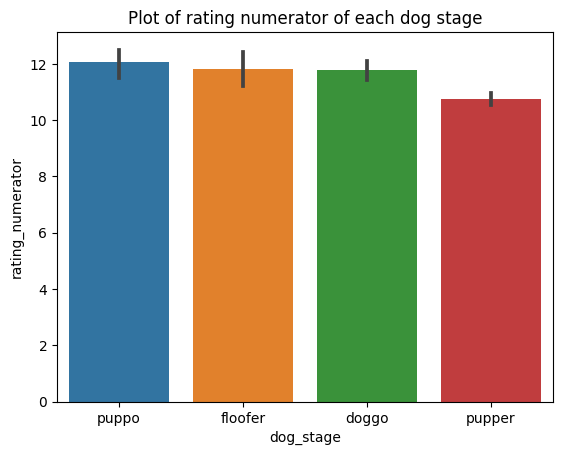

In [471]:
# create an order for barplot
order = twitter_achive_final.groupby(["dog_stage"])["rating_numerator"].mean().sort_values(ascending=False).index

#plot barplot
sns.barplot(x='dog_stage', 
            y='rating_numerator', 
            data= twitter_achive_final,
            order= order)
plt.title('Plot of rating numerator of each dog stage')
plt.show();

The barplot above shows that dog stage Puppo has the highest rating

In [472]:
# displays the correlation between numerical columns  in our dataset
df_corr = twitter_achive_final.corr(numeric_only=True)

In [473]:
df_corr

,tweet_id,rating_numerator,rating_denominator,id,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
tweet_id,1.000000,0.043650,-0.023759,1.000000,0.363728,0.609595,0.210535,0.105686,0.005725,-0.052661
rating_numerator,0.043650,1.000000,0.181640,0.043650,0.007233,0.004614,0.000804,-0.007499,-0.018663,-0.004472
rating_denominator,-0.023759,0.181640,1.000000,-0.023759,-0.019979,-0.026535,-0.004625,-0.004732,-0.032210,0.007395
id,1.000000,0.043650,-0.023759,1.000000,0.363728,0.609595,0.210535,0.105686,0.005725,-0.052661
retweet_count,0.363728,0.007233,-0.019979,0.363728,1.000000,0.914561,0.100631,0.046958,-0.009994,-0.043534
favorite_count,0.609595,0.004614,-0.026535,0.609595,0.914561,1.000000,0.133870,0.072240,-0.014044,-0.054633
img_num,0.210535,0.000804,-0.004625,0.210535,0.100631,0.133870,1.000000,0.207153,-0.156728,-0.142360
p1_conf,0.105686,-0.007499,-0.004732,0.105686,0.046958,0.072240,0.207153,1.000000,-0.507209,-0.708195
p2_conf,0.005725,-0.018663,-0.032210,0.005725,-0.009994,-0.014044,-0.156728,-0.507209,1.000000,0.478653
p3_conf,-0.052661,-0.004472,0.007395,-0.052661,-0.043534,-0.054633,-0.142360,-0.708195,0.478653,1.000000


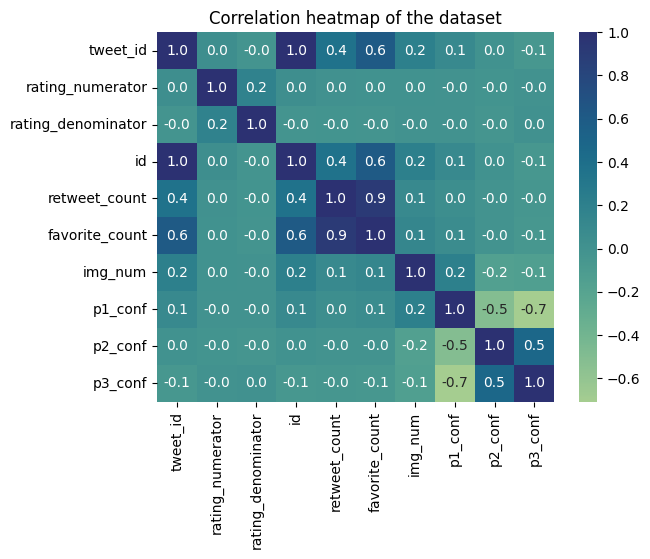

In [475]:
# plot correlation heatmap
hm = sns.heatmap(data= df_corr, cmap='crest', annot=True, fmt= '.1f')
plt.title('Correlation heatmap of the dataset')
plt.show();

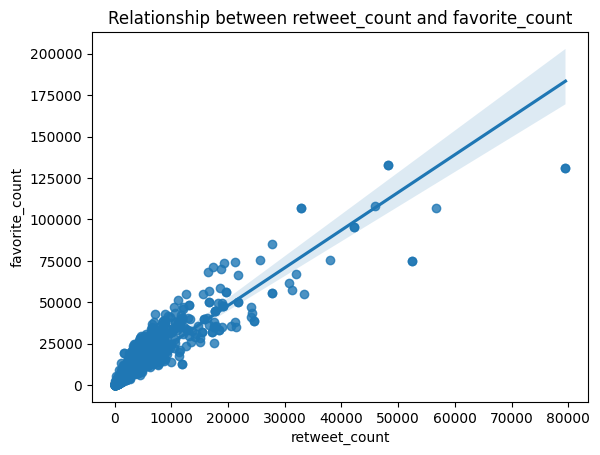

In [477]:
# plot regression plot
sns.regplot(x='retweet_count', y='favorite_count', data= twitter_achive_final)
plt.title('Relationship between retweet_count and favorite_count')
plt.show();

The Regression plot above shows that favorite count increases as retweet count increases. They are positively correlated